In [16]:
import os
import pandas as pd
from tqdm.notebook import tqdm
from rdkit import Chem
import matplotlib.pyplot as plt
from rdkit.Chem.Descriptors import MolWt
from rdkit.Chem import Descriptors

In [17]:
root_path = '../data/final_datasets/'
file_list = [os.path.join(root_path,x) for x in os.listdir(root_path) if 'csv' in x]

In [18]:
atom_count_list = []
file_name_list = []

for file in tqdm(file_list):
    df = pd.read_csv(file)
    mol_list = df['Smiles_unify'].map(Chem.MolFromSmiles)
    atom_counts = mol_list.map(lambda x: x.GetNumAtoms())
    atom_counts = [x for x in atom_counts if x <=100]
    atom_count_list += atom_counts
    file_name_list += [file.split('/')[-1].split('.')[0].split('_final_data')[0]]*len(atom_counts)
    

  0%|          | 0/11 [00:00<?, ?it/s]

In [19]:
atom_counts_df = pd.DataFrame({'atom_counts':atom_count_list,'property':file_name_list})

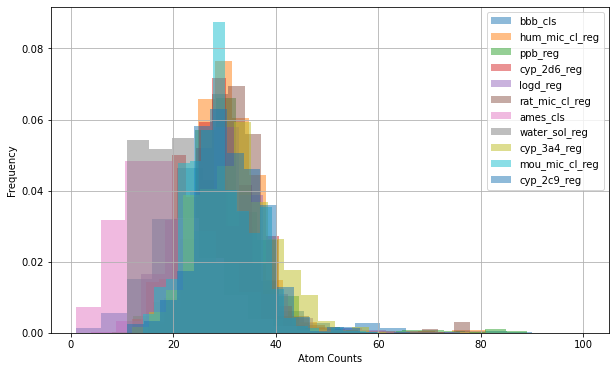

In [21]:
# Get unique properties
properties = atom_counts_df['property'].unique()

plt.figure(figsize=(10, 6))  # 10 inches wide, 6 inches tall
# Plot histograms for each property
for prop in properties:
    subset = atom_counts_df[atom_counts_df['property'] == prop]
    subset['atom_counts'].hist(alpha=0.5,density=True, label=prop, bins=20)

# Customizations
# plt.title('Histogram of Atom Counts Grouped by Properties')
plt.xlabel('Atom Counts')
plt.ylabel('Frequency')

# Adding a legend
plt.legend()
plt.savefig('figure/atom_counts.png')
# Show Plot
plt.show()



In [22]:
mw_list = []
file_name_list = []

for file in tqdm(file_list):
    df = pd.read_csv(file)
    mol_list = df['Smiles_unify'].map(Chem.MolFromSmiles)
    mw = mol_list.map(lambda x: MolWt(x))
    mw = [x for x in mw if x <=1000]
    mw_list += mw
    file_name_list += [file.split('/')[-1].split('.')[0].split('_final_data')[0]]*len(mw)
    

  0%|          | 0/11 [00:00<?, ?it/s]

In [23]:
df = pd.DataFrame({'molecule_weights':mw_list,'property':file_name_list})

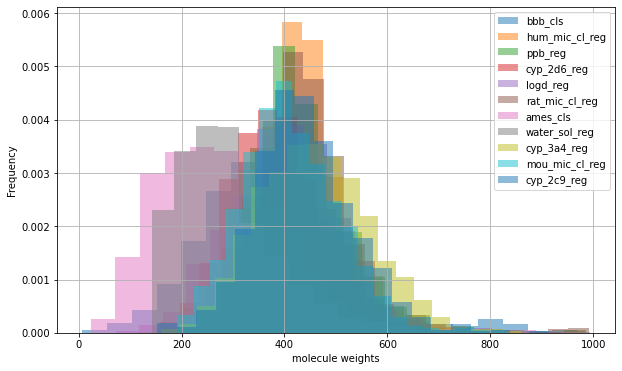

In [25]:
# Get unique properties
properties = df['property'].unique()

plt.figure(figsize=(10, 6))  # 10 inches wide, 6 inches tall
# Plot histograms for each property
for prop in properties:
    subset = df[df['property'] == prop]
    subset['molecule_weights'].hist(alpha=0.5,density=True,  label=prop, bins=20)

# Customizations
# plt.title('Histogram of Atom Counts Grouped by Properties')
plt.xlabel('molecule weights')
plt.ylabel('Frequency')

# Adding a legend
plt.legend()
plt.savefig('figure/molecule_weights.png')
# Show Plot
plt.show()



In [26]:
qed_list = []
logp_list = []
file_name_list = []

for file in tqdm(file_list):
    df = pd.read_csv(file)
    mol_list = df['Smiles_unify'].map(Chem.MolFromSmiles)
    qed = mol_list.apply(Descriptors.qed)
    qed = [x for x in qed]
    qed_list += qed
    
    logp = mol_list.map(Descriptors.MolLogP)
    logp = [x for x in logp]
    logp_list += logp
    
    file_name_list += [file.split('/')[-1].split('.')[0].split('_final_data')[0]]*len(qed)
    

  0%|          | 0/11 [00:00<?, ?it/s]

In [27]:
df = pd.DataFrame({'logp':logp_list,'qed':qed_list,'property':file_name_list})

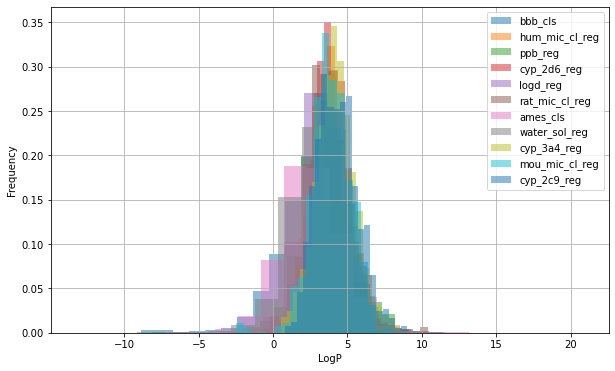

In [28]:
# Get unique properties
properties = df['property'].unique()

plt.figure(figsize=(10, 6))  # 10 inches wide, 6 inches tall
# Plot histograms for each property
for prop in properties:
    tmp = df['logp'] > -5
    subset = df[df['property'] == prop]
    subset['logp'].hist(alpha=0.5,density=True,  label=prop, bins=20)

# Customizations

plt.xlabel('LogP')
plt.ylabel('Frequency')

# Adding a legend
plt.legend()
plt.savefig('figure/logp.png')
# Show Plot
plt.show()



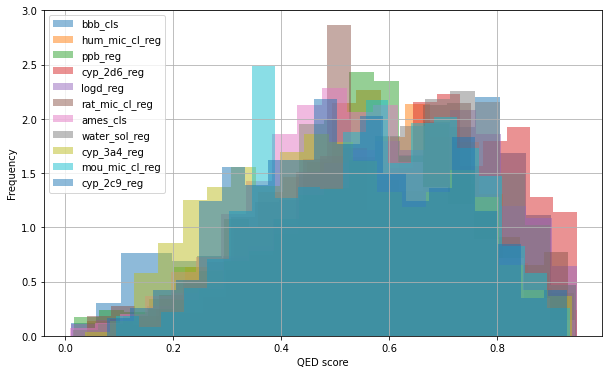

In [29]:
# Get unique properties
properties = df['property'].unique()

plt.figure(figsize=(10, 6))  # 10 inches wide, 6 inches tall
# Plot histograms for each property
for prop in properties:
    subset = df[df['property'] == prop]
    subset['qed'].hist(alpha=0.5,density=True,  label=prop, bins=20)

# Customizations

plt.xlabel('QED score')
plt.ylabel('Frequency')

# Adding a legend
plt.legend()
plt.savefig('figure/qed.png')
# Show Plot
plt.show()

